# Function Codes

In [12]:
def dataCleaning(df, code=True, tips=False, orientation=True, formatIssues=True, missingValues=True, duplicateValues=True, outliers=True):
    """
    ------------------
    Consolidation of the usual data cleaning steps for a df, November 2022
    Made by Sebastien Garneau, sebastien.garneau@gmail.com
    ------------------
    df: your dataframe

    code: A text template to note your observations as you go. Use the code snippets included in the output. copy-paste into vscode/notepad

    tips: Provides snippets of code to help you clean potential issues in your df. If you prefer this to code
    
    orientation: Provides information about the shape/objects of your data
    
    formatIssues: Provides detailed information on each column to help identify format issues
    
    missingValues: Provides information on missing values
    
    duplicateValues: Provides information on duplicate values
    
    outliers: Provides information on outliers
    """
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    if code==True:
        print("### CLEANING CODE:")
        print("df = dfX #Change to your df's name")
        print()
        print("#### Change column value:")
        print()
        print()
        print("#### Drop entire column:")
        print()
        print()
        print("#### Change column type:")
        print()
        print()
        print("#### Change column name:")
        print()
        print()
        print("#### Handle missing values:")
        print()
        print()
        print("#### Handle duplicate values:")
        print("# df.drop_duplicates(inplace=True) # drop ALL duplicate rows")
        print()
        print("#### Drop outliers:")
        print()
        print()
        print("#### Other observations / further investigations:")
        print("#")
        print("#")
        print("#")
        print()
        print("df.head() #Final Review")
        print("# dfX = df #Change to your df's name")
        print()
        print("=========================================")
    
    if orientation==True:
        print("ORIENTATION")
        print(df.info())
        print("=========================================")
        print()
        
    
    if formatIssues==True:
        print("FORMAT ISSUES")
        print()
        for col in df.columns:
            if df[col].dtype == 'object' or df[col].dtype == 'int64' or df[col].dtype == 'datetime64':
                print("df.rename(columns={'" + col + "': ''}, inplace=True)", "#rename column")
                print("df['" + col + "'] = df['" + col + "'].replace('old_value', 'new_value')")
                print("df['" + col + "'] = df['" + col + "'].astype('new_type') # new_type can be int64, float64, object, category, datetime64")
                print("df.drop('" + col + "', axis=1, inplace=True)")                
                pd.set_option('display.max_rows', None)
                print(df.groupby(col, sort=True).size())
                pd.reset_option('display.max_rows')
                #display the dtypes of the column
                print("Current Column DType: ", df[col].dtype, "     Do not compare with above. This one will always return int64 as it's the dtype of the count")                
                print("df['" + col + "'] = df['" + col + "'].astype('new_type') # new_type can be int64, float64, object, category, datetime64")
                print()
            #else:
            #    print(col)
            #    print(df[col].describe())
            #    print()

        if tips==True:
            print("TIPS")
            print("To make a correction to a column, use the following syntax:")
            print("df['A'] = df['A'].apply(lambda x: x.replace('old_value', 'new_value'))")
            print()
            print("To change a column data type, use the following syntax:")
            print("df['A'] = pd.to_datetime(df['A']) # for datetime")
            print("df['A'] = df['A'].astype('int64') # for integers")
            print("df['A'] = df['A'].astype('float64') # for floats")
            print("df['A'] = df['A'].astype('category') # for categorical")
            print("df['A'] = df['A'].astype('object') # for object")
            print()
        print("=========================================")
        print()

    if missingValues==True:
        print("MISSING VALUES")
        print()
        for col in df.columns:
            if df[col].isnull().sum() > 0:
                print(col, ":", df[col].isnull().sum(), " missing values")
                print("df.dropna(subset=['" + col + "'], inplace=True)")
                print("df['" + col + "'].fillna(df['" + col + "'].mean(), inplace=True) #fill NA entries with the mean")
                print("df['" + col + "'].fillna(0, inplace=True) # fill NA entries with a single value, such as zero")
                print()
                print(df.loc[df[col].isnull()].head())
                print()
            else:
                print(col, ": No missing values")
                print()
                                    
        if tips==True:
            print()
            print("TIPS")
            print("You can drop rows with missing values using one of the following code:")
            print("df.dropna(subset=['col'], inplace=True) #For a single column")
            print("df.dropna(inplace=True) #For all columns")
            print()
            print("You can fill rows with missing values using one of the following code:")
            print("df['col'].fillna(df['col'].mean(), inplace=True) #fill NA entries with the mean")
            print("df['col'].fillna(0, inplace=True) # fill NA entries with a single value, such as zero")
            print("df['col'].fillna(method='ffill') # forward-fill to propagate the previous value forward")
            print("df['col'].fillna(method='bfill' # back-fill to propagate the next values backward)")
            print()
            print("To view them:")
            print("df.loc[df[col].isnull()].head()")
            print()
        print("=========================================")
        print()

    if duplicateValues==True:
        print("DUPLICATE VALUES")
        print()
        print(df[df.duplicated()].head())
        print()

        if tips==True:
            print("TIPS")
            print("You can drop duplicate rows using the following code:")
            print("df.drop_duplicates(inplace=True)")
            print("df.drop_duplicates(subset=['col'], inplace=True) #For a single column")
            print()
            print("To view them:")
            print("df[df.duplicated()].head()")
            print()
    
        print("=========================================")
        print()

    if outliers==True:
        print("OUTLIERS")
        print()
        for col in df.columns:
            if df[col].dtype == 'int64' or df[col].dtype == 'float64':
                print(col)
                print("-----")
                print("Outlier(s):")
                print("Below ", df[col].mean() - 3*df[col].std(), " -> ", df[df[col] < df[col].mean() - 3*df[col].std()].shape[0], " low outlier(s)")
                print("Above ", df[col].mean() + 3*df[col].std(), " -> ", df[df[col] > df[col].mean() + 3*df[col].std()].shape[0], " high outlier(s)")
                low = df[col].mean() - 3*df[col].std()
                high = df[col].mean() + 3*df[col].std()
                print("df = df[(df['" + col + "'] > " + str(low) + ") & (df['" + col + "'] < " + str(high) + ")]")
                print()
                print(df[col].describe())
                print()
                print("Boxplot")
                sns.boxplot(df[col])
                plt.show()
                print()
                print("Histogram")
                sns.histplot(df[col])
                plt.show()
                print("=========================================")
                print()

        if tips==True:
            print("TIPS")
            print("You can drop outliers using the following code:")
            print("df = df[(df['column'] > lower_bound) & (df['column'] < upper_bound)]")
            print()

# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
flights_100K = pd.read_csv("../../data/raw/100K_pull_flights(26Nov).csv")

In [4]:
flights_100K.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-02-02,DL,DL,DL,1090,DL,N961DN,1090,10397,ATL,...,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-02,DL,DL,DL,1091,DL,N916DN,1091,12451,JAX,...,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-02,DL,DL,DL,1092,DL,N949DL,1092,11996,GSP,...,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-02,DL,DL,DL,1093,DL,N900DE,1093,10397,ATL,...,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-02,DL,DL,DL,1093,DL,N900DE,1093,12264,IAD,...,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Clean

### CLEANING CODE:
df = dfX #Change to your df's name

#### Change column value:


#### Drop entire column:


#### Change column type:


#### Change column name:


#### Handle missing values:


#### Handle duplicate values:
# df.drop_duplicates(inplace=True) # drop ALL duplicate rows

#### Drop outliers:


#### Other observations / further investigations:
#
#
#

df.head() #Final Review
# dfX = df #Change to your df's name

ORIENTATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   fl_date              100000 non-null  object 
 1   mkt_unique_carrier   100000 non-null  object 
 2   branded_code_share   100000 non-null  object 
 3   mkt_carrier          100000 non-null  object 
 4   mkt_carrier_fl_num   100000 non-null  int64  
 5   op_unique_carrier    100000 non-null  object 
 6   tail_num             99420 non-null   

C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


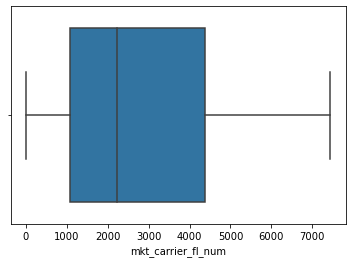


Histogram


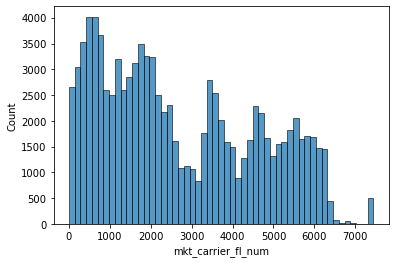


op_carrier_fl_num
-----
Outlier(s):
Below  -2954.9514398811452  ->  0  low outlier(s)
Above  8365.439499881144  ->  2  high outlier(s)
df = df[(df['op_carrier_fl_num'] > -2954.9514398811452) & (df['op_carrier_fl_num'] < 8365.439499881144)]

count    100000.000000
mean       2705.244030
std        1886.731823
min           1.000000
25%        1074.000000
50%        2225.000000
75%        4366.000000
max        9339.000000
Name: op_carrier_fl_num, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


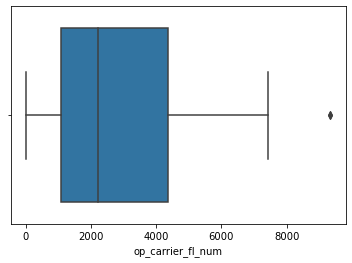


Histogram


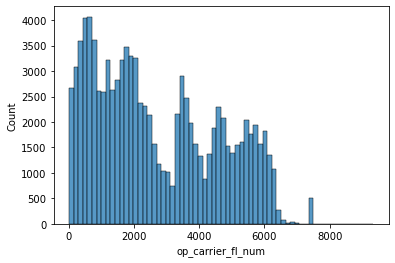


origin_airport_id
-----
Outlier(s):
Below  8119.539594644222  ->  0  low outlier(s)
Above  17214.445165355777  ->  0  high outlier(s)
df = df[(df['origin_airport_id'] > 8119.539594644222) & (df['origin_airport_id'] < 17214.445165355777)]

count    100000.000000
mean      12666.992380
std        1515.817595
min       10135.000000
25%       11292.000000
50%       12889.000000
75%       14027.000000
max       16218.000000
Name: origin_airport_id, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


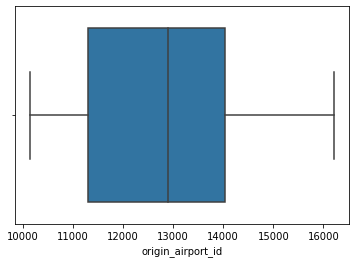


Histogram


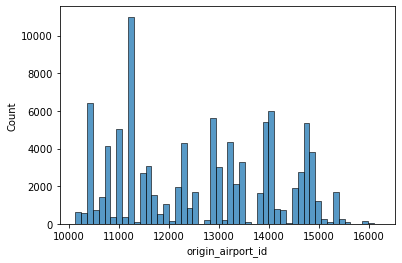


dest_airport_id
-----
Outlier(s):
Below  8118.298952827214  ->  0  low outlier(s)
Above  17230.521627172784  ->  0  high outlier(s)
df = df[(df['dest_airport_id'] > 8118.298952827214) & (df['dest_airport_id'] < 17230.521627172784)]

count    100000.000000
mean      12674.410290
std        1518.703779
min       10135.000000
25%       11292.000000
50%       12889.000000
75%       14057.000000
max       16218.000000
Name: dest_airport_id, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


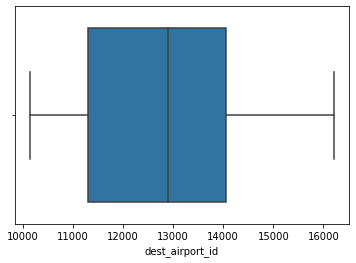


Histogram


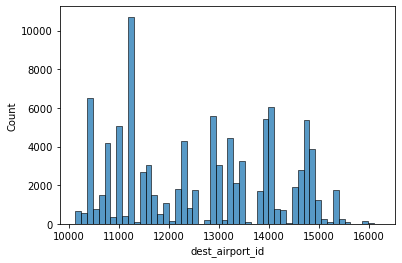


crs_dep_time
-----
Outlier(s):
Below  -116.69505485948002  ->  0  low outlier(s)
Above  2754.94741485948  ->  0  high outlier(s)
df = df[(df['crs_dep_time'] > -116.69505485948002) & (df['crs_dep_time'] < 2754.94741485948)]

count    100000.000000
mean       1319.126180
std         478.607078
min           6.000000
25%         915.000000
50%        1315.000000
75%        1720.000000
max        2359.000000
Name: crs_dep_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


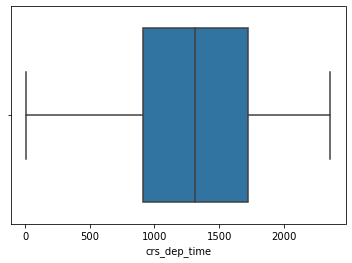


Histogram


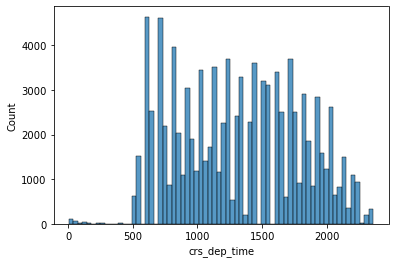


dep_time
-----
Outlier(s):
Below  -145.34912007170237  ->  0  low outlier(s)
Above  2800.408125291672  ->  0  high outlier(s)
df = df[(df['dep_time'] > -145.34912007170237) & (df['dep_time'] < 2800.408125291672)]

count    97127.000000
mean      1327.529503
std        490.959541
min          1.000000
25%        919.000000
50%       1322.000000
75%       1732.000000
max       2400.000000
Name: dep_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


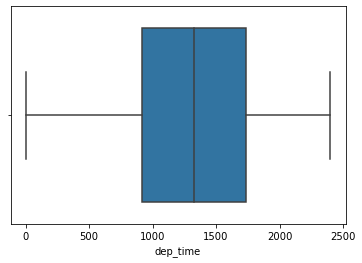


Histogram


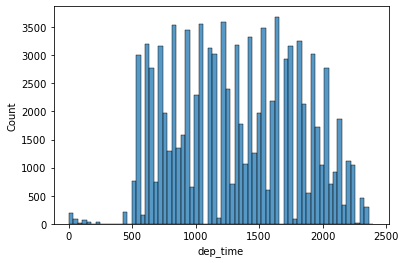


dep_delay
-----
Outlier(s):
Below  -134.73225994298653  ->  0  low outlier(s)
Above  157.16590376279444  ->  1820  high outlier(s)
df = df[(df['dep_delay'] > -134.73225994298653) & (df['dep_delay'] < 157.16590376279444)]

count    97052.000000
mean        11.216822
std         48.649694
min        -51.000000
25%         -6.000000
50%         -2.000000
75%          7.000000
max       1296.000000
Name: dep_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


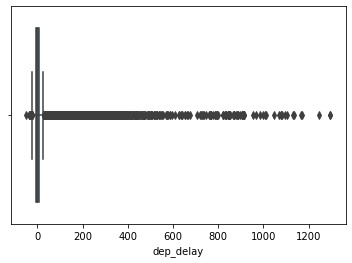


Histogram


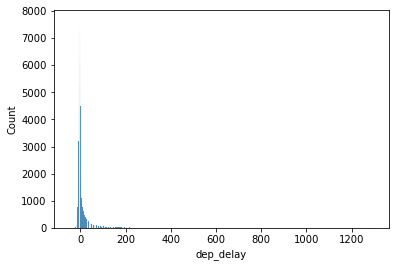


taxi_out
-----
Outlier(s):
Below  -17.489648919033392  ->  0  low outlier(s)
Above  54.755926969072085  ->  2013  high outlier(s)
df = df[(df['taxi_out'] > -17.489648919033392) & (df['taxi_out'] < 54.755926969072085)]

count    96925.000000
mean        18.633139
std         12.040929
min          1.000000
25%         12.000000
50%         15.000000
75%         21.000000
max        170.000000
Name: taxi_out, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


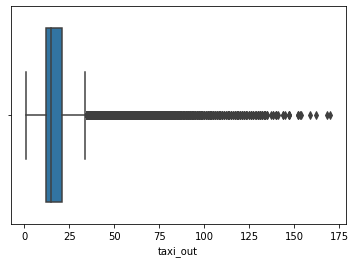


Histogram


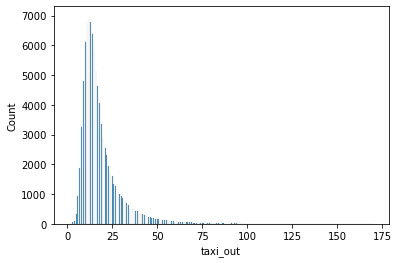


wheels_off
-----
Outlier(s):
Below  -113.64852639969877  ->  0  low outlier(s)
Above  2825.7844871941275  ->  0  high outlier(s)
df = df[(df['wheels_off'] > -113.64852639969877) & (df['wheels_off'] < 2825.7844871941275)]

count    96925.000000
mean      1356.067980
std        489.905502
min          1.000000
25%        939.000000
50%       1338.000000
75%       1748.000000
max       2400.000000
Name: wheels_off, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


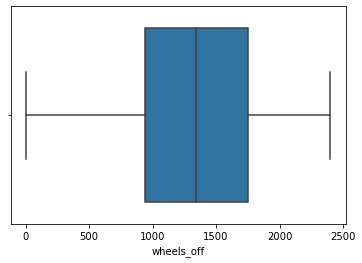


Histogram


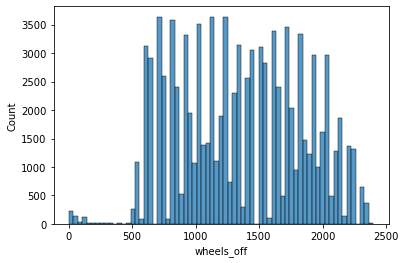


wheels_on
-----
Outlier(s):
Below  -55.022179873910545  ->  0  low outlier(s)
Above  3010.2026278970343  ->  0  high outlier(s)
df = df[(df['wheels_on'] > -55.022179873910545) & (df['wheels_on'] < 3010.2026278970343)]

count    96870.000000
mean      1477.590224
std        510.870801
min          1.000000
25%       1101.000000
50%       1510.000000
75%       1907.000000
max       2400.000000
Name: wheels_on, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


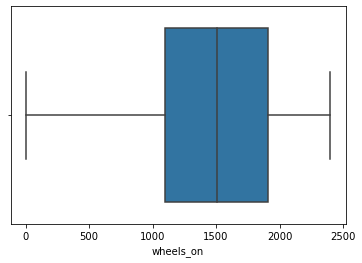


Histogram


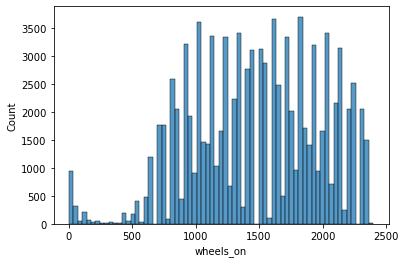


taxi_in
-----
Outlier(s):
Below  -10.45644040640464  ->  0  low outlier(s)
Above  25.276756293676243  ->  1717  high outlier(s)
df = df[(df['taxi_in'] > -10.45644040640464) & (df['taxi_in'] < 25.276756293676243)]

count    96870.000000
mean         7.410158
std          5.955533
min          1.000000
25%          4.000000
50%          6.000000
75%          9.000000
max        129.000000
Name: taxi_in, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


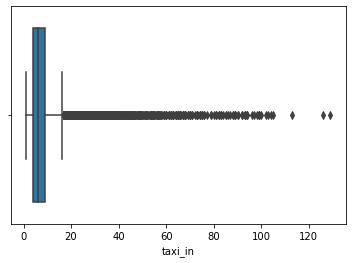


Histogram


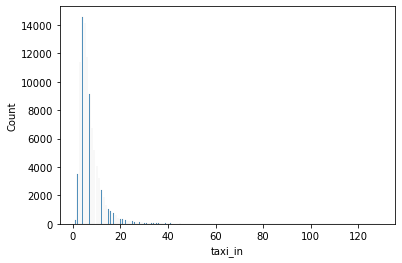


crs_arr_time
-----
Outlier(s):
Below  -6.766654049977433  ->  0  low outlier(s)
Above  2990.7891940499776  ->  0  high outlier(s)
df = df[(df['crs_arr_time'] > -6.766654049977433) & (df['crs_arr_time'] < 2990.7891940499776)]

count    100000.000000
mean       1492.011270
std         499.592641
min           1.000000
25%        1110.000000
50%        1515.000000
75%        1910.000000
max        2359.000000
Name: crs_arr_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


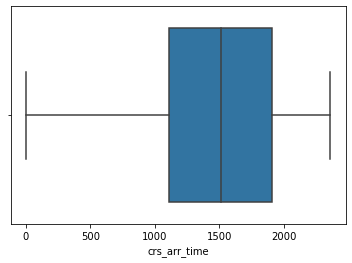


Histogram


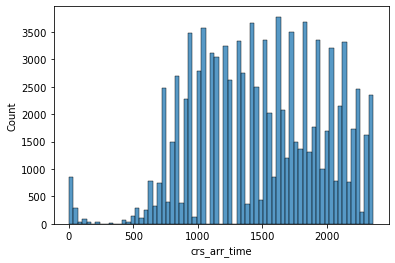


arr_time
-----
Outlier(s):
Below  -58.19525576946626  ->  0  low outlier(s)
Above  3025.9215481174465  ->  0  high outlier(s)
df = df[(df['arr_time'] > -58.19525576946626) & (df['arr_time'] < 3025.9215481174465)]

count    96994.000000
mean      1483.863146
std        514.019467
min          1.000000
25%       1106.000000
50%       1514.000000
75%       1913.000000
max       2400.000000
Name: arr_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


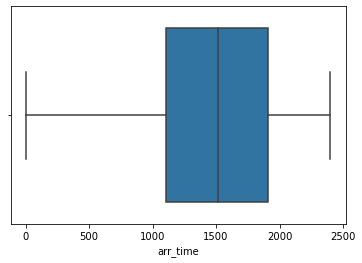


Histogram


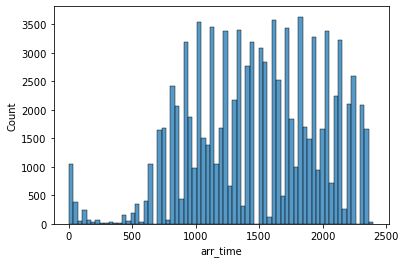


arr_delay
-----
Outlier(s):
Below  -147.5935242674272  ->  0  low outlier(s)
Above  160.0070022091358  ->  1730  high outlier(s)
df = df[(df['arr_delay'] > -147.5935242674272) & (df['arr_delay'] < 160.0070022091358)]

count    96721.000000
mean         6.206739
std         51.266754
min        -75.000000
25%        -16.000000
50%         -7.000000
75%          9.000000
max       1292.000000
Name: arr_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


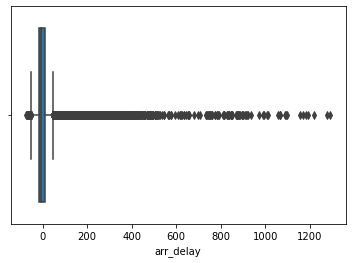


Histogram


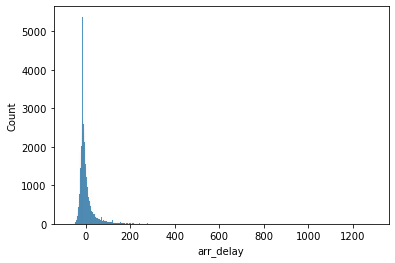


cancelled
-----
Outlier(s):
Below  -0.47957770777595393  ->  0  low outlier(s)
Above  0.5389777077759539  ->  2970  high outlier(s)
df = df[(df['cancelled'] > -0.47957770777595393) & (df['cancelled'] < 0.5389777077759539)]

count    100000.000000
mean          0.029700
std           0.169759
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: cancelled, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


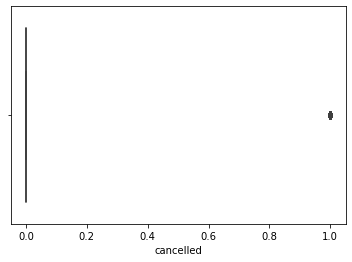


Histogram


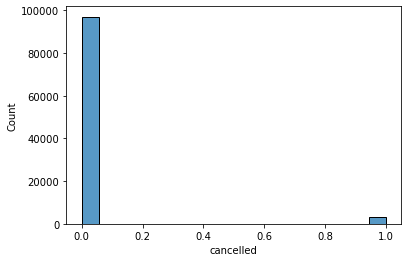


diverted
-----
Outlier(s):
Below  -0.15045510180063054  ->  0  low outlier(s)
Above  0.15567510180063054  ->  261  high outlier(s)
df = df[(df['diverted'] > -0.15045510180063054) & (df['diverted'] < 0.15567510180063054)]

count    100000.000000
mean          0.002610
std           0.051022
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: diverted, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


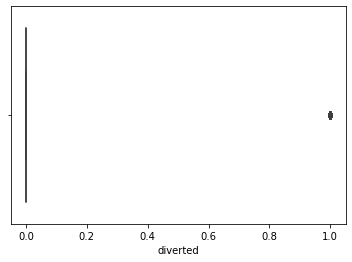


Histogram


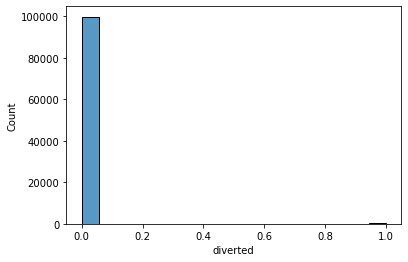


crs_elapsed_time
-----
Outlier(s):
Below  -77.47862635876419  ->  0  low outlier(s)
Above  355.4765463587642  ->  1861  high outlier(s)
df = df[(df['crs_elapsed_time'] > -77.47862635876419) & (df['crs_elapsed_time'] < 355.4765463587642)]

count    100000.000000
mean        138.998960
std          72.159195
min         -60.000000
25%          88.000000
50%         120.000000
75%         170.000000
max         695.000000
Name: crs_elapsed_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


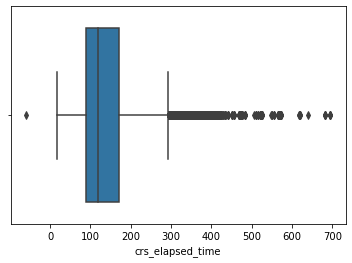


Histogram


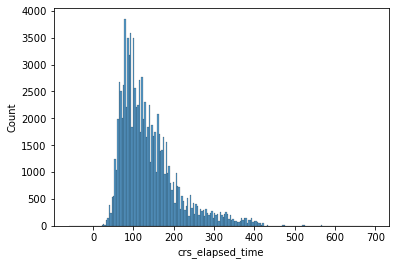


actual_elapsed_time
-----
Outlier(s):
Below  -82.34016519630853  ->  0  low outlier(s)
Above  351.84407657288574  ->  1694  high outlier(s)
df = df[(df['actual_elapsed_time'] > -82.34016519630853) & (df['actual_elapsed_time'] < 351.84407657288574)]

count    96769.000000
mean       134.751956
std         72.364040
min         14.000000
25%         82.000000
50%        117.000000
75%        166.000000
max        715.000000
Name: actual_elapsed_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


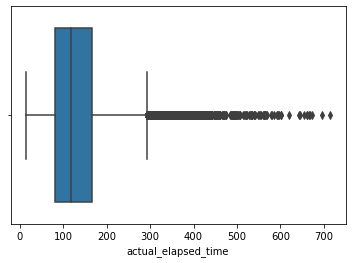


Histogram


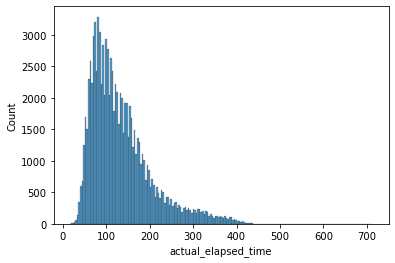


air_time
-----
Outlier(s):
Below  -102.52791501937025  ->  0  low outlier(s)
Above  320.2615201349467  ->  1740  high outlier(s)
df = df[(df['air_time'] > -102.52791501937025) & (df['air_time'] < 320.2615201349467)]

count    96646.000000
mean       108.866803
std         70.464906
min          8.000000
25%         57.000000
50%         90.000000
75%        139.000000
max        688.000000
Name: air_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


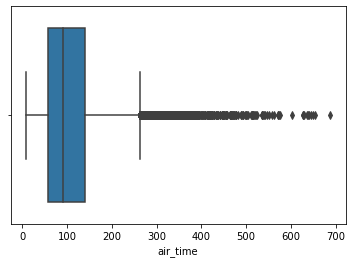


Histogram


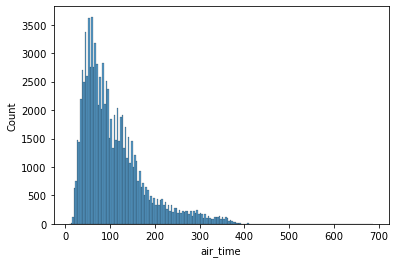


flights
-----
Outlier(s):
Below  1.0  ->  0  low outlier(s)
Above  1.0  ->  0  high outlier(s)
df = df[(df['flights'] > 1.0) & (df['flights'] < 1.0)]

count    100000.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: flights, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


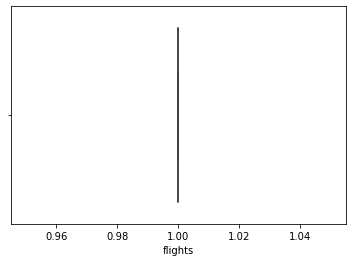


Histogram


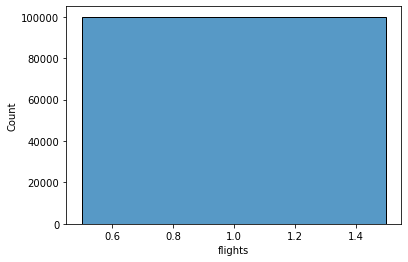


distance
-----
Outlier(s):
Below  -974.5033319048971  ->  0  low outlier(s)
Above  2490.059571904897  ->  1666  high outlier(s)
df = df[(df['distance'] > -974.5033319048971) & (df['distance'] < 2490.059571904897)]

count    100000.000000
mean        757.778120
std         577.427151
min          16.000000
25%         335.000000
50%         599.000000
75%         997.000000
max        4983.000000
Name: distance, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


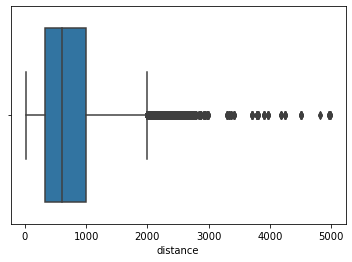


Histogram


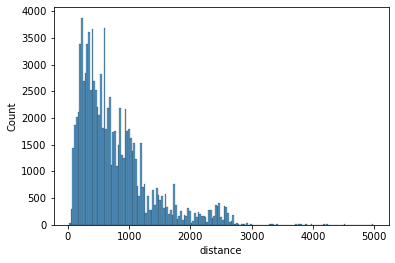


carrier_delay
-----
Outlier(s):
Below  -152.5500629801578  ->  0  low outlier(s)
Above  189.06961000132964  ->  320  high outlier(s)
df = df[(df['carrier_delay'] > -152.5500629801578) & (df['carrier_delay'] < 189.06961000132964)]

count    20310.000000
mean        18.259774
std         56.936612
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max       1220.000000
Name: carrier_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


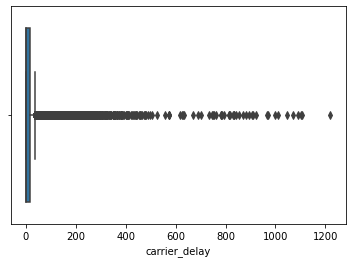


Histogram


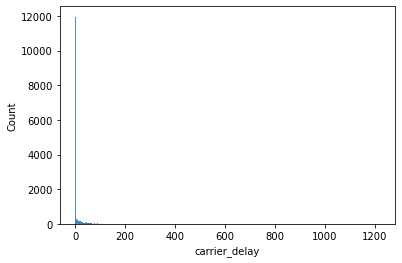


weather_delay
-----
Outlier(s):
Below  -99.01760626381996  ->  0  low outlier(s)
Above  109.88013703683818  ->  269  high outlier(s)
df = df[(df['weather_delay'] > -99.01760626381996) & (df['weather_delay'] < 109.88013703683818)]

count    20310.000000
mean         5.431265
std         34.816291
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1158.000000
Name: weather_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


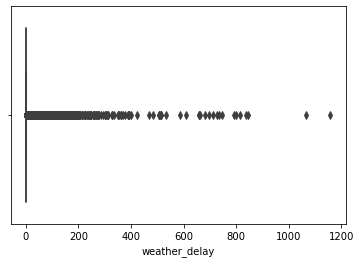


Histogram


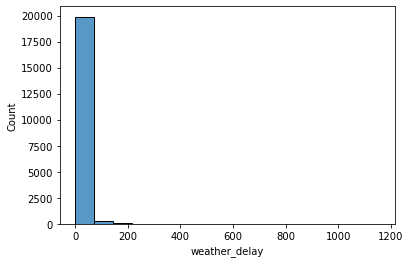


nas_delay
-----
Outlier(s):
Below  -79.6526213045164  ->  0  low outlier(s)
Above  113.43528994065625  ->  364  high outlier(s)
df = df[(df['nas_delay'] > -79.6526213045164) & (df['nas_delay'] < 113.43528994065625)]

count    20310.000000
mean        16.891334
std         32.181319
min          0.000000
25%          0.000000
50%          4.000000
75%         22.000000
max        846.000000
Name: nas_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


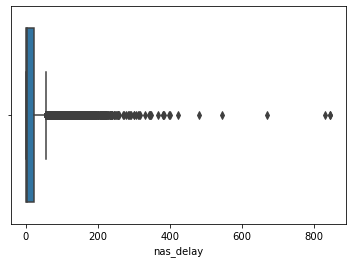


Histogram


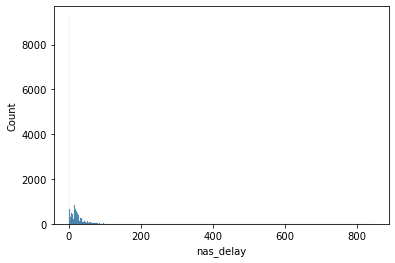


security_delay
-----
Outlier(s):
Below  -4.824771614446704  ->  0  low outlier(s)
Above  4.932797217597861  ->  36  high outlier(s)
df = df[(df['security_delay'] > -4.824771614446704) & (df['security_delay'] < 4.932797217597861)]

count    20310.000000
mean         0.054013
std          1.626261
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         99.000000
Name: security_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


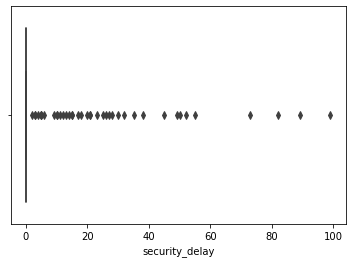


Histogram


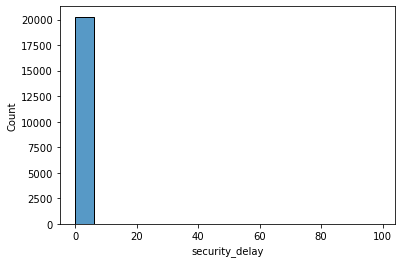


late_aircraft_delay
-----
Outlier(s):
Below  -142.16409198625192  ->  0  low outlier(s)
Above  198.6241609178127  ->  398  high outlier(s)
df = df[(df['late_aircraft_delay'] > -142.16409198625192) & (df['late_aircraft_delay'] < 198.6241609178127)]

count    20310.000000
mean        28.230034
std         56.798042
min          0.000000
25%          0.000000
50%          0.000000
75%         33.000000
max       1257.000000
Name: late_aircraft_delay, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


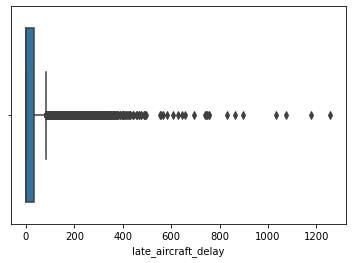


Histogram


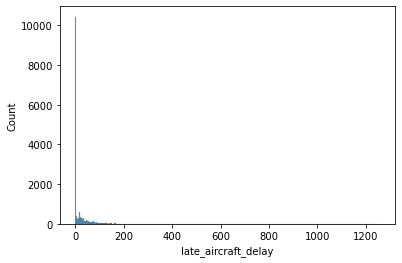


first_dep_time
-----
Outlier(s):
Below  -222.65773827460725  ->  0  low outlier(s)
Above  2656.493166846036  ->  0  high outlier(s)
df = df[(df['first_dep_time'] > -222.65773827460725) & (df['first_dep_time'] < 2656.493166846036)]

count     875.000000
mean     1216.917714
std       479.858484
min         7.000000
25%       817.500000
50%      1151.000000
75%      1612.000000
max      2354.000000
Name: first_dep_time, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


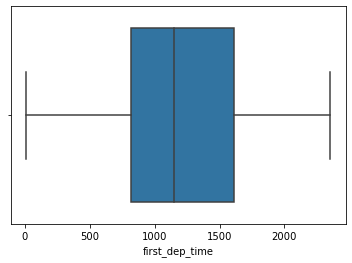


Histogram


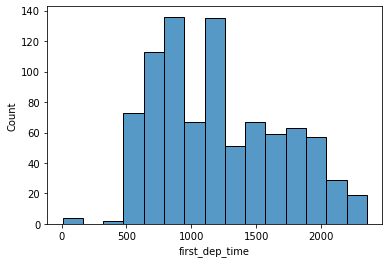


total_add_gtime
-----
Outlier(s):
Below  -79.7784674205558  ->  0  low outlier(s)
Above  171.35103884912724  ->  12  high outlier(s)
df = df[(df['total_add_gtime'] > -79.7784674205558) & (df['total_add_gtime'] < 171.35103884912724)]

count    875.000000
mean      45.786286
std       41.854918
min        1.000000
25%       19.000000
50%       32.000000
75%       57.000000
max      358.000000
Name: total_add_gtime, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


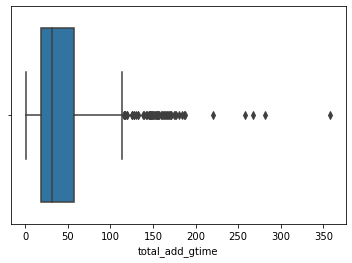


Histogram


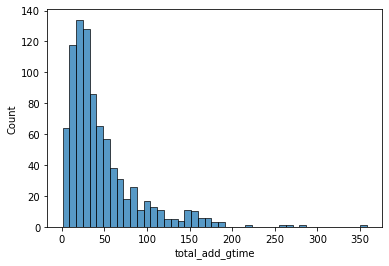


longest_add_gtime
-----
Outlier(s):
Below  -69.67317192067085  ->  0  low outlier(s)
Above  158.76117192067085  ->  18  high outlier(s)
df = df[(df['longest_add_gtime'] > -69.67317192067085) & (df['longest_add_gtime'] < 158.76117192067085)]

count    875.000000
mean      44.544000
std       38.072391
min        1.000000
25%       19.000000
50%       32.000000
75%       56.500000
max      188.000000
Name: longest_add_gtime, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


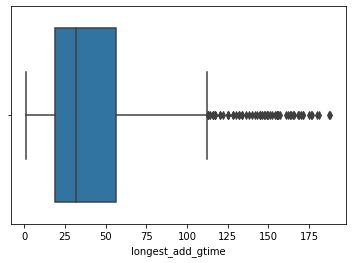


Histogram


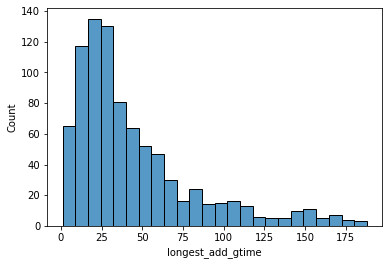


no_name
-----
Outlier(s):
Below  nan  ->  0  low outlier(s)
Above  nan  ->  0  high outlier(s)
df = df[(df['no_name'] > nan) & (df['no_name'] < nan)]

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: no_name, dtype: float64

Boxplot


C:\Users\mnicn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


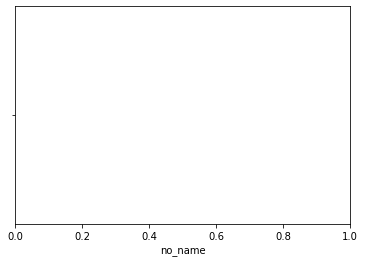


Histogram


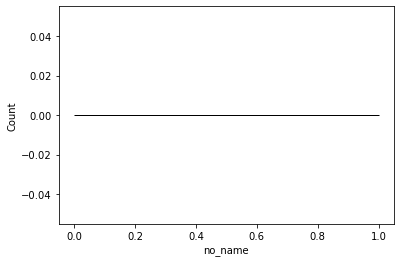

In [13]:
dataCleaning(flights_100K)

In [14]:
### CLEANING CODE:
df = flights_100K #Change to your df's name

#### Change column value:


#### Drop entire column:


#### Change column type:
df['fl_date'] = df['fl_date'].astype('datetime64') # new_type can be int64, float64, object, category, datetime64


#### Change column name:
df.rename(columns={'fl_date': 'flight_date'}, inplace=True) #rename column


#### Handle missing values:


#### Handle duplicate values:
# df.drop_duplicates(inplace=True) # drop ALL duplicate rows

#### Drop outliers:


#### Other observations / further investigations:
# 580 tail numbers missing, skipped
# 2873 missing values in departure time
# no duplicate rows 
# no outliers
# there are massive outliers in the dep_delay column and taxi_out

df.head() #Final Review
# dfX = df #Change to your df's name

,flight_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-02-02,DL,DL,DL,1090,DL,N961DN,1090,10397,ATL,...,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-02-02,DL,DL,DL,1091,DL,N916DN,1091,12451,JAX,...,270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-02-02,DL,DL,DL,1092,DL,N949DL,1092,11996,GSP,...,153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-02-02,DL,DL,DL,1093,DL,N900DE,1093,10397,ATL,...,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-02-02,DL,DL,DL,1093,DL,N900DE,1093,12264,IAD,...,534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Export to CSV